In [ ]:
#This dataset to be analyzed includes data on the events captured from 911 calls to the Seattle Police Department. 
#The dynamics of various criminal events could be examined using this set of procedures.

#Importing the necessary Packages in the Jupyter Notebook
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [ ]:
#Reading and Visualizing the Seattle Police Department 911 Incident Response dataset
import pandas as pd
#df = pd.read_csv('C://Users//n//Documents//Seattle_Police_Department_911_Incident_Response.csv')
df = pd.read_csv('C:/Users/n/AppData/Local/Temp/Rar$DIa0.764/Seattle_Police_Department_911_Incident_Response.csv')
df.head()


In [3]:
#Displays the first 10 values of the dataset
df.head()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,﻿15736,10000246357,2010246357,242.0,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,7/17/2010 20:49,3XX BLOCK OF PINE ST,M,M2,8100.2001,-122.338147,47.610975,"(47.610975163, -122.338146748)",NaN,NaN,NaN,NaN
1,15737,10000246471,2010246471,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,7/17/2010 20:50,36XX BLOCK OF DISCOVERY PARK BLVD,Q,Q1,5700.1012,-122.404613,47.658325,"(47.658324899, -122.404612874)",NaN,NaN,NaN,NaN
2,15738,10000246255,2010246255,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",7/17/2010 20:55,21XX BLOCK OF 3RD AVE,M,M2,7200.2025,-122.342843,47.613551,"(47.613551471, -122.342843234)",NaN,NaN,NaN,NaN
3,15739,10000246473,2010246473,460.0,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,7/17/2010 21:00,7XX BLOCK OF ROY ST,D,D1,7200.1002,-122.341847,47.625401,"(47.625401388, -122.341846999)",NaN,NaN,NaN,NaN
4,15740,10000246330,2010246330,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",7/17/2010 21:00,9XX BLOCK OF ALOHA ST,D,D1,6700.1009,-122.339709,47.627425,"(47.627424837, -122.339708605)",NaN,NaN,NaN,NaN


In [4]:
#Displays the last 10 values of the dataset
df.tail()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
1048570,1263594,11000021013,201121013,100.0,FRAUD (INCLUDING IDENTITY THEFT),FRAUD CALLS,FRAUD CALLS,1/18/2011 17:46,24XX BLOCK OF 4TH AVE,M,M1,7200.2016,-122.345703,47.616414,"(47.616414163, -122.345702752)",SECONDARY - FORGERY/BUNCO/SCAMS/ID THEFT,FRAUD CALLS,FRAUD CALLS,1/18/2011 17:26
1048571,1263595,11000021011,201121011,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,1/18/2011 19:23,18XX BLOCK OF EASTLAKE AVE E,D,D2,6600.2001,-122.325401,47.635370,"(47.635369535, -122.325400816)",THEFT OF SERVICES,OTHER PROPERTY,THEFT,1/18/2011 16:44
1048572,1263596,11000021010,201121010,64.0,SHOPLIFT,THEFT,SHOPLIFTING,1/18/2011 17:36,24XX BLOCK OF S JACKSON ST,G,G2,8900.6009,-122.300511,47.599278,"(47.599277528, -122.300510574)",SHOPLIFT - THEFT,SHOPLIFTING,THEFT,1/18/2011 16:49
1048573,1263597,11000021009,201121009,244.0,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,1/18/2011 19:31,12XX BLOCK OF S CLOVERDALE ST,F,F3,11200.3009,-122.316246,47.526445,"(47.526444721, -122.316246131)","DISTURBANCE, MISCELLANEOUS/OTHER",DISTURBANCES,DISTURBANCES,1/18/2011 16:56
1048574,1263599,11000021006,201121006,430.0,ACCIDENT INVESTIGATION,TRAFFIC RELATED CALLS,ACCIDENT INVESTIGATION,1/18/2011 18:14,2XX BLOCK OF ELLIOTT AVE W,Q,Q3,7100.1016,-122.360486,47.620293,"(47.620293019, -122.360485841)",TRU - ACC - HIT AND RUN,ACCIDENT INVESTIGATION,TRAFFIC RELATED CALLS,1/18/2011 17:59


In [5]:

# select the columns that contain the values of the variables
subset_data = df[['Initial Type Description', 'Initial Type Group', 'District/Sector', 'Hundred Block Location', 'At Scene Time', 'Event Clearance Date']]

# transform the categorical values into numerical values
subset_data['Initial Type Group'] = subset_data['Initial Type Group'].replace(['DISTURBANCES', 'THEFT', 'NUISANCE, MISCHIEF', 'TRAFFIC RELATED CALLS'], [0, 1, 2, 3])
#Python or R script to generate a subset of the givendata.
# print the subset of the data
print(subset_data)

                         Initial Type Description Initial Type Group  \
0                                             NaN                NaN   
1                                             NaN                NaN   
2                                             NaN                NaN   
3                                             NaN                NaN   
4                                             NaN                NaN   
...                                           ...                ...   
1048570  SECONDARY - FORGERY/BUNCO/SCAMS/ID THEFT        FRAUD CALLS   
1048571                         THEFT OF SERVICES                  1   
1048572                          SHOPLIFT - THEFT                  1   
1048573          DISTURBANCE, MISCELLANEOUS/OTHER                  0   
1048574                   TRU - ACC - HIT AND RUN                  3   

        District/Sector             Hundred Block Location    At Scene Time  \
0                     M               3XX BLOCK OF PINE 

C:\Users\n\AppData\Local\Temp\ipykernel_1724\130088270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Initial Type Group'] = subset_data['Initial Type Group'].replace(['DISTURBANCES', 'THEFT', 'NUISANCE, MISCHIEF', 'TRAFFIC RELATED CALLS'], [0, 1, 2, 3])


In [ ]:
#Drop the Insufficient Columns
df.columns
df.drop(['Initial Type Description', 'Initial Type Subgroup',
       'Initial Type Group', 'At Scene Time'], axis = 1, inplace = True)

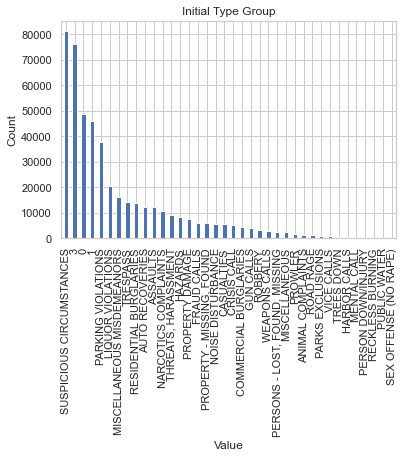

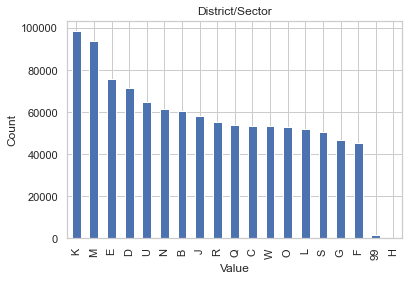

In [ ]:
#script to count the different values of each relevant variable (column).script to count
#the different values of each relevant  variable (column).script to count the different values of each relevant variable 
#(column).count the different values of each relevant variable

count_initial_type_group = subset_data['Initial Type Group'].value_counts()
count_district_sector = subset_data['District/Sector'].value_counts()
count_at_scene_time = subset_data['At Scene Time'].value_counts()

# generate a histogram for each variable
count_initial_type_group.plot(kind='bar')
plt.title("Initial Type Group")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

count_district_sector.plot(kind='bar')
plt.title("District/Sector")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

count_at_scene_time.plot(kind='bar')
plt.title("At Scene Time")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

In [ ]:
# transform the categorical values into numerical values
df = pd.read_csv('C:/Users/n/AppData/Local/Temp/Rar$DIa0.764/Seattle_Police_Department_911_Incident_Response.csv')
subset_data = df[['Initial Type Description', 'Initial Type Group', 'District/Sector', 'Hundred Block Location', 'At Scene Time', 'Event Clearance Date']]
subset_data['Initial Type Group'] = subset_data['Initial Type Group'].replace(['DISTURBANCES', 'THEFT', 'NUISANCE, MISCHIEF', 'TRAFFIC RELATED CALLS'], [0, 1, 2, 3])

# Then generate the statistical descriptions of the variables
desc = subset_data.describe()

In [ ]:
df = pd.read_csv('C:/Users/n/AppData/Local/Temp/Rar$DIa0.764/Seattle_Police_Department_911_Incident_Response.csv')
sns.lmplot(x='Longitude', y='Latitude', hue='District/Sector', 
           data=df, 
           fit_reg=False, scatter_kws={'alpha':0.1})

In [ ]:
sns.lmplot(x='Longitude', y='Latitude', hue='Zone/Beat', 
           data=df, 
           fit_reg=False, scatter_kws={'alpha':0.1})

In [ ]:
#Seattle Police Department 911 Incident Response Cleaning
print(df.shape)
df.isna().sum().sort_values()

In [ ]:
df = pd.read_csv('C:/Users/n/AppData/Local/Temp/Rar$DIa0.764/Seattle_Police_Department_911_Incident_Response.csv')
def rand_id(x):
    return np.random.randint(100000000, 1000000000, 1)[0]
    
df.loc[df['CAD CDW ID'].isna(),'CAD CDW ID'] = df.loc[df['CAD CDW ID'].isna(),'CAD CDW ID'].apply(rand_id)

In [ ]:
#Data Preparation and Distribution Analysis
df.columns
df.drop(['Initial Type Description', 'Initial Type Subgroup',
       'Initial Type Group', 'At Scene Time'], axis = 1, inplace = True)

In [ ]:
#Stating location address during classification
df.drop('Incident Location', axis = 1, inplace = True)
df_copy.drop('address', axis = 1, inplace = True)

In [ ]:
df_copy.to_csv('C:\\Users\\n\\Documents\\Seattle_Police_Department_911_Incident_Response.csv', index=False)

In [ ]:
#The End of Preliminary Analysis and Process Planning